In [1]:
import pyspark
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./data/time_per_metro.csv")
df

,Unnamed: 0,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,...,2065,2972,3194,3342,3002,2857,2311,2523,1830,1012.0
1,1,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,...,2308,2286,2354,2261,1922,1696,1620,1181,768,503.0
2,2,2020-01-01,1호선,151,시청,승차,105,118,123,206,...,763,873,1019,1234,1383,1271,1061,991,572,219.0
3,3,2020-01-01,1호선,151,시청,하차,81,223,334,570,...,1021,885,783,849,602,435,293,273,174,175.0
4,4,2020-01-01,1호선,152,종각,승차,798,366,198,236,...,1190,1636,1748,1890,1879,1827,1955,1800,1259,412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338151,338151,2021-08-31,8호선,2825,신흥,하차,24,125,126,284,...,185,265,273,344,604,464,254,245,152,53.0
338152,338152,2021-08-31,8호선,2826,수진,승차,144,247,624,839,...,170,178,307,282,244,124,112,109,60,15.0
338153,338153,2021-08-31,8호선,2826,수진,하차,26,80,120,408,...,210,244,266,333,590,493,270,276,192,73.0
338154,338154,2021-08-31,8호선,2827,모란,승차,67,126,344,441,...,207,216,292,277,348,154,128,120,72,10.0


## 1. 데이터 전처리

In [3]:
# 데이터프레임 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338156 entries, 0 to 338155
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     338156 non-null  int64  
 1   날짜             338156 non-null  object 
 2   호선             338156 non-null  object 
 3   역번호            338156 non-null  int64  
 4   역명             338156 non-null  object 
 5   구분             338156 non-null  object 
 6   06:00 이전       338156 non-null  int64  
 7   06:00 ~ 07:00  338156 non-null  int64  
 8   07:00 ~ 08:00  338156 non-null  int64  
 9   08:00 ~ 09:00  338156 non-null  int64  
 10  09:00 ~ 10:00  338156 non-null  int64  
 11  10:00 ~ 11:00  338156 non-null  int64  
 12  11:00 ~ 12:00  338156 non-null  int64  
 13  12:00 ~ 13:00  338156 non-null  int64  
 14  13:00 ~ 14:00  338156 non-null  int64  
 15  14:00 ~ 15:00  338156 non-null  int64  
 16  15:00 ~ 16:00  338156 non-null  int64  
 17  16:00 ~ 17:00  338156 non-nul

In [4]:
#필요없는 컬럼 삭제
df = df.drop(["Unnamed: 0", "역번호"], axis=1)
df

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2020-01-01,1호선,서울역,승차,356,280,313,774,923,1418,...,2065,2972,3194,3342,3002,2857,2311,2523,1830,1012.0
1,2020-01-01,1호선,서울역,하차,235,952,828,1043,1694,1655,...,2308,2286,2354,2261,1922,1696,1620,1181,768,503.0
2,2020-01-01,1호선,시청,승차,105,118,123,206,318,309,...,763,873,1019,1234,1383,1271,1061,991,572,219.0
3,2020-01-01,1호선,시청,하차,81,223,334,570,611,612,...,1021,885,783,849,602,435,293,273,174,175.0
4,2020-01-01,1호선,종각,승차,798,366,198,236,310,379,...,1190,1636,1748,1890,1879,1827,1955,1800,1259,412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338151,2021-08-31,8호선,신흥,하차,24,125,126,284,162,172,...,185,265,273,344,604,464,254,245,152,53.0
338152,2021-08-31,8호선,수진,승차,144,247,624,839,352,253,...,170,178,307,282,244,124,112,109,60,15.0
338153,2021-08-31,8호선,수진,하차,26,80,120,408,164,203,...,210,244,266,333,590,493,270,276,192,73.0
338154,2021-08-31,8호선,모란,승차,67,126,344,441,247,162,...,207,216,292,277,348,154,128,120,72,10.0


In [5]:
#날짜 컬럼이 string이라서 datetime 데이터타입으로 변환해줘야함.
df['날짜'] = pd.to_datetime(df['날짜'])
df.dtypes

날짜               datetime64[ns]
호선                       object
역명                       object
구분                       object
06:00 이전                  int64
06:00 ~ 07:00             int64
07:00 ~ 08:00             int64
08:00 ~ 09:00             int64
09:00 ~ 10:00             int64
10:00 ~ 11:00             int64
11:00 ~ 12:00             int64
12:00 ~ 13:00             int64
13:00 ~ 14:00             int64
14:00 ~ 15:00             int64
15:00 ~ 16:00             int64
16:00 ~ 17:00             int64
17:00 ~ 18:00             int64
18:00 ~ 19:00             int64
19:00 ~ 20:00             int64
20:00 ~ 21:00             int64
21:00 ~ 22:00             int64
22:00 ~ 23:00             int64
23:00 이후                float64
dtype: object

In [6]:
#요일 컬럼 만들기
df["요일"] = df["날짜"].dt.day_name()
df

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후,요일
0,2020-01-01,1호선,서울역,승차,356,280,313,774,923,1418,...,2972,3194,3342,3002,2857,2311,2523,1830,1012.0,Wednesday
1,2020-01-01,1호선,서울역,하차,235,952,828,1043,1694,1655,...,2286,2354,2261,1922,1696,1620,1181,768,503.0,Wednesday
2,2020-01-01,1호선,시청,승차,105,118,123,206,318,309,...,873,1019,1234,1383,1271,1061,991,572,219.0,Wednesday
3,2020-01-01,1호선,시청,하차,81,223,334,570,611,612,...,885,783,849,602,435,293,273,174,175.0,Wednesday
4,2020-01-01,1호선,종각,승차,798,366,198,236,310,379,...,1636,1748,1890,1879,1827,1955,1800,1259,412.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338151,2021-08-31,8호선,신흥,하차,24,125,126,284,162,172,...,265,273,344,604,464,254,245,152,53.0,Tuesday
338152,2021-08-31,8호선,수진,승차,144,247,624,839,352,253,...,178,307,282,244,124,112,109,60,15.0,Tuesday
338153,2021-08-31,8호선,수진,하차,26,80,120,408,164,203,...,244,266,333,590,493,270,276,192,73.0,Tuesday
338154,2021-08-31,8호선,모란,승차,67,126,344,441,247,162,...,216,292,277,348,154,128,120,72,10.0,Tuesday


In [7]:
#2020년 1월 20일부터 코로나 첫 확진자가 발생하였으므로 이전 데이터들 제거!
a = df[df["날짜"] == "2020-01-20"] #10476번째가 2020-01-20 시작이므로 10475번째까지 제거
a

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후,요일
10476,2020-01-20,1호선,서울역,승차,378,582,2114,3400,2385,2065,...,3361,3484,5641,10111,4716,3360,3178,1993,1034.0,Monday
10477,2020-01-20,1호선,서울역,하차,369,2308,4526,10577,6619,3198,...,2667,2709,3120,3367,2310,1674,1295,952,726.0,Monday
10478,2020-01-20,1호선,시청,승차,99,140,297,379,485,660,...,1680,1761,2853,6976,2928,2297,2402,1408,523.0,Monday
10479,2020-01-20,1호선,시청,하차,174,850,3085,9527,3508,1759,...,1103,870,1005,1009,478,323,265,206,166.0,Monday
10480,2020-01-20,1호선,종각,승차,94,148,248,388,577,774,...,2900,3225,5422,10686,4953,4329,4755,3568,1427.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11021,2020-01-20,8호선,신흥,하차,21,89,122,267,232,249,...,355,402,399,730,599,372,319,294,224.0,Monday
11022,2020-01-20,8호선,수진,승차,139,261,668,984,480,341,...,359,384,371,366,201,174,123,107,83.0,Monday
11023,2020-01-20,8호선,수진,하차,25,81,121,339,303,258,...,359,384,393,623,591,348,328,276,266.0,Monday
11024,2020-01-20,8호선,모란,승차,85,104,429,556,272,250,...,313,334,382,432,206,184,162,165,120.0,Monday


In [8]:
df = df.drop(labels=range(0,10476), axis=0).reset_index(drop=True)
df

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후,요일
0,2020-01-20,1호선,서울역,승차,378,582,2114,3400,2385,2065,...,3361,3484,5641,10111,4716,3360,3178,1993,1034.0,Monday
1,2020-01-20,1호선,서울역,하차,369,2308,4526,10577,6619,3198,...,2667,2709,3120,3367,2310,1674,1295,952,726.0,Monday
2,2020-01-20,1호선,시청,승차,99,140,297,379,485,660,...,1680,1761,2853,6976,2928,2297,2402,1408,523.0,Monday
3,2020-01-20,1호선,시청,하차,174,850,3085,9527,3508,1759,...,1103,870,1005,1009,478,323,265,206,166.0,Monday
4,2020-01-20,1호선,종각,승차,94,148,248,388,577,774,...,2900,3225,5422,10686,4953,4329,4755,3568,1427.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327675,2021-08-31,8호선,신흥,하차,24,125,126,284,162,172,...,265,273,344,604,464,254,245,152,53.0,Tuesday
327676,2021-08-31,8호선,수진,승차,144,247,624,839,352,253,...,178,307,282,244,124,112,109,60,15.0,Tuesday
327677,2021-08-31,8호선,수진,하차,26,80,120,408,164,203,...,244,266,333,590,493,270,276,192,73.0,Tuesday
327678,2021-08-31,8호선,모란,승차,67,126,344,441,247,162,...,216,292,277,348,154,128,120,72,10.0,Tuesday


In [9]:
#공휴일 모듈 설치
!pip3 install holidays

In [10]:
#한국 공휴일 객체 생성
import holidays
kr_holidays = holidays.KR()

In [11]:
#공휴일 컬럼 생성
df["공휴일"] = df["날짜"].apply(lambda x: 'holiday' if x in kr_holidays else 'non-holiday')
df

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후,요일,공휴일
0,2020-01-20,1호선,서울역,승차,378,582,2114,3400,2385,2065,...,3484,5641,10111,4716,3360,3178,1993,1034.0,Monday,non-holiday
1,2020-01-20,1호선,서울역,하차,369,2308,4526,10577,6619,3198,...,2709,3120,3367,2310,1674,1295,952,726.0,Monday,non-holiday
2,2020-01-20,1호선,시청,승차,99,140,297,379,485,660,...,1761,2853,6976,2928,2297,2402,1408,523.0,Monday,non-holiday
3,2020-01-20,1호선,시청,하차,174,850,3085,9527,3508,1759,...,870,1005,1009,478,323,265,206,166.0,Monday,non-holiday
4,2020-01-20,1호선,종각,승차,94,148,248,388,577,774,...,3225,5422,10686,4953,4329,4755,3568,1427.0,Monday,non-holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327675,2021-08-31,8호선,신흥,하차,24,125,126,284,162,172,...,273,344,604,464,254,245,152,53.0,Tuesday,non-holiday
327676,2021-08-31,8호선,수진,승차,144,247,624,839,352,253,...,307,282,244,124,112,109,60,15.0,Tuesday,non-holiday
327677,2021-08-31,8호선,수진,하차,26,80,120,408,164,203,...,266,333,590,493,270,276,192,73.0,Tuesday,non-holiday
327678,2021-08-31,8호선,모란,승차,67,126,344,441,247,162,...,292,277,348,154,128,120,72,10.0,Tuesday,non-holiday


In [12]:
#5-1과정을 이용해 역이름 변경
#딕셔너리에 변경해주려는 것으로 설정.
station_need_change = {"강변(동서울터미널)": "강변", "교대(법원.검찰청)": "교대", "구의(광진구청)": "구의", "낙성대(강감찬)": "낙성대", 
                       "대림(구로구청)": "대림", "동대문역사문화공원(DDP)(DDP)": "동대문역사문화공원(DDP)",
                       "삼성(무역센터)": "삼성", "서울대입구(관악구청)": "서울대입구", "왕십리(성동구청)": "왕십리", "용두(동대문구청)": "용두",
                       "잠실(송파구청)": "잠실", "충정로(경기대입구)": "충정로", "경복궁(정부서울청사)": "경복궁", "남부터미널(예술의전당)": "남부터미널",
                       "동작(현충원)": "동작", "미아(서울사이버대학)": "미아", "성신여대입구(돈암)": "성신여대입구", "수유(강북구청)": "수유",
                       "숙대입구(갈월)": "숙대입구", "이촌(국립중앙박물관)": "이촌", "총신대입구(이수)": "이수(총신대입구)", "한성대입구(삼선교)": "한성대입구",
                       "회현(남대문시장)": "회현", "광나루(장신대)": "광나루", "광화문(세종문화회관)": "광화문", "군자(능동)": "군자",
                       "굽은다리(강동구민회관앞)": "굽은다리", "신정(은행정)": "신정", "아차산(어린이대공원후문)": "아차산", "오목교(목동운동장앞)": "오목교",
                       "올림픽공원(한국체대)": "올림픽공원", "천호(풍납토성)": "천호", "고려대(종암)": "고려대", "광흥창(서강)": "굉흥창",
                       "녹사평(용산구청)": "녹사평", "대흥(서강대앞)": "대흥", "봉화산(서울의료원)": "봉화산", "상월곡(한국과학기술연구원)": "상월곡",
                       "새절(신사)": "새절", "안암(고대병원앞)": "안암", "월곡(동덕여대)": "월곡", "월드컵경기장(성산)": "월드컵경기장",
                       "증산(명지대앞)": "증산", "화랑대(서울여대입구)": "화랑대", "상봉(시외버스터미널)": "상봉", "숭실대입구(살피재)": "숭실대입구",
                       "어린이대공원(세종대)": "어린이대공원", "온수(성공회대입구)": "온수", "용마산(용마폭포공원)": "용마산",
                       "남한산성입구(성남법원.검찰청)": "남한산성입구", "몽촌토성(평화의문)": "몽촌토성", "공릉(서울과학기술대)" : "공릉",
                       "양재(서초구청)" : "양재", "이수" : "이수(총신대입구)", "청량리(서울시립대입구)" : "청량리"
                    }

In [13]:
df = df.replace({"역명" : station_need_change })
df

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후,요일,공휴일
0,2020-01-20,1호선,서울역,승차,378,582,2114,3400,2385,2065,...,3484,5641,10111,4716,3360,3178,1993,1034.0,Monday,non-holiday
1,2020-01-20,1호선,서울역,하차,369,2308,4526,10577,6619,3198,...,2709,3120,3367,2310,1674,1295,952,726.0,Monday,non-holiday
2,2020-01-20,1호선,시청,승차,99,140,297,379,485,660,...,1761,2853,6976,2928,2297,2402,1408,523.0,Monday,non-holiday
3,2020-01-20,1호선,시청,하차,174,850,3085,9527,3508,1759,...,870,1005,1009,478,323,265,206,166.0,Monday,non-holiday
4,2020-01-20,1호선,종각,승차,94,148,248,388,577,774,...,3225,5422,10686,4953,4329,4755,3568,1427.0,Monday,non-holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327675,2021-08-31,8호선,신흥,하차,24,125,126,284,162,172,...,273,344,604,464,254,245,152,53.0,Tuesday,non-holiday
327676,2021-08-31,8호선,수진,승차,144,247,624,839,352,253,...,307,282,244,124,112,109,60,15.0,Tuesday,non-holiday
327677,2021-08-31,8호선,수진,하차,26,80,120,408,164,203,...,266,333,590,493,270,276,192,73.0,Tuesday,non-holiday
327678,2021-08-31,8호선,모란,승차,67,126,344,441,247,162,...,292,277,348,154,128,120,72,10.0,Tuesday,non-holiday


In [14]:
df["역명"].value_counts()

동대문역사문화공원(DDP)    3540
종로3가              3540
가락시장              2360
서울역               2360
잠실                2360
                  ... 
미사                 788
강일                 326
하남검단산              320
하남시청(덕풍·신장)        320
신내                  74
Name: 역명, Length: 247, dtype: int64

### 평일 데이터 프레임 생성하기

* 평일과 공휴일을 데이터프레임을 따로 만들어서 조건에 맞게 설정 후 병합할 예정!

In [15]:
#평일만 나타내기
df1 = df.drop(df[(df["요일"] == "Saturday") | (df["요일"] == "Sunday") | (df["공휴일"] == "holiday")].index).reset_index(drop=True)
df1

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후,요일,공휴일
0,2020-01-20,1호선,서울역,승차,378,582,2114,3400,2385,2065,...,3484,5641,10111,4716,3360,3178,1993,1034.0,Monday,non-holiday
1,2020-01-20,1호선,서울역,하차,369,2308,4526,10577,6619,3198,...,2709,3120,3367,2310,1674,1295,952,726.0,Monday,non-holiday
2,2020-01-20,1호선,시청,승차,99,140,297,379,485,660,...,1761,2853,6976,2928,2297,2402,1408,523.0,Monday,non-holiday
3,2020-01-20,1호선,시청,하차,174,850,3085,9527,3508,1759,...,870,1005,1009,478,323,265,206,166.0,Monday,non-holiday
4,2020-01-20,1호선,종각,승차,94,148,248,388,577,774,...,3225,5422,10686,4953,4329,4755,3568,1427.0,Monday,non-holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224439,2021-08-31,8호선,신흥,하차,24,125,126,284,162,172,...,273,344,604,464,254,245,152,53.0,Tuesday,non-holiday
224440,2021-08-31,8호선,수진,승차,144,247,624,839,352,253,...,307,282,244,124,112,109,60,15.0,Tuesday,non-holiday
224441,2021-08-31,8호선,수진,하차,26,80,120,408,164,203,...,266,333,590,493,270,276,192,73.0,Tuesday,non-holiday
224442,2021-08-31,8호선,모란,승차,67,126,344,441,247,162,...,292,277,348,154,128,120,72,10.0,Tuesday,non-holiday


In [16]:
#평일인지 확인
df1["요일"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [17]:
df1.dtypes

날짜               datetime64[ns]
호선                       object
역명                       object
구분                       object
06:00 이전                  int64
06:00 ~ 07:00             int64
07:00 ~ 08:00             int64
08:00 ~ 09:00             int64
09:00 ~ 10:00             int64
10:00 ~ 11:00             int64
11:00 ~ 12:00             int64
12:00 ~ 13:00             int64
13:00 ~ 14:00             int64
14:00 ~ 15:00             int64
15:00 ~ 16:00             int64
16:00 ~ 17:00             int64
17:00 ~ 18:00             int64
18:00 ~ 19:00             int64
19:00 ~ 20:00             int64
20:00 ~ 21:00             int64
21:00 ~ 22:00             int64
22:00 ~ 23:00             int64
23:00 이후                float64
요일                       object
공휴일                      object
dtype: object

In [18]:
df1["역명"].value_counts()

동대문역사문화공원(DDP)    2424
종로3가              2424
가락시장              1616
서울역               1616
잠실                1616
                  ... 
미사                 538
강일                 228
하남검단산              222
하남시청(덕풍·신장)        222
신내                  46
Name: 역명, Length: 247, dtype: int64

In [19]:
#요일별로 그룹화하기
#호선을 구분한 이유는 지하철역마다 환승하는 역이 있으므로 구분해주었음.
weekday = df1.groupby(["호선","역명","요일","구분"]).mean().sort_values(["호선","역명","요일"]).reset_index()
weekday

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,1호선,동대문,Friday,승차,498.584416,323.012987,514.285714,688.519481,604.064935,514.402597,...,672.935065,710.415584,776.519481,829.454545,867.389610,573.363636,455.714286,446.181818,374.857143,155.480519
1,1호선,동대문,Friday,하차,78.766234,236.350649,441.103896,910.818182,798.415584,658.701299,...,639.324675,633.142857,580.558442,621.467532,698.389610,739.285714,468.428571,378.857143,353.337662,379.623377
2,1호선,동대문,Monday,승차,484.679012,329.419753,522.925926,682.037037,583.234568,500.555556,...,670.962963,699.592593,740.370370,781.530864,813.740741,545.950617,419.802469,396.271605,310.185185,124.222222
3,1호선,동대문,Monday,하차,79.580247,246.913580,436.246914,921.419753,813.419753,649.703704,...,634.407407,621.962963,565.012346,587.543210,642.493827,722.962963,451.222222,355.160494,324.654321,361.209877
4,1호선,동대문,Thursday,승차,502.901235,329.419753,515.407407,687.901235,596.753086,500.506173,...,661.629630,694.049383,748.456790,798.666667,812.370370,543.222222,431.493827,413.555556,328.074074,132.432099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,8호선,천호,Thursday,하차,63.135802,385.506173,580.839506,1121.938272,836.790123,566.320988,...,675.567901,863.049383,1025.234568,1440.456790,2617.012346,1873.123457,938.666667,851.283951,707.469136,462.037037
2826,8호선,천호,Tuesday,승차,405.547619,646.178571,1717.035714,2382.761905,1241.154762,610.464286,...,575.142857,600.642857,687.154762,897.571429,1096.059524,700.226190,585.059524,477.511905,337.107143,118.357143
2827,8호선,천호,Tuesday,하차,62.202381,378.523810,585.976190,1133.404762,869.154762,574.904762,...,660.547619,848.273810,1005.321429,1417.059524,2625.523810,1926.000000,961.440476,841.142857,664.166667,432.869048
2828,8호선,천호,Wednesday,승차,404.913580,650.358025,1699.740741,2341.049383,1220.296296,613.555556,...,580.617284,606.864198,690.308642,896.617284,1098.543210,696.061728,602.654321,493.259259,352.567901,126.864198


In [20]:
#요일 정렬하기
#요일을 정렬할 때 string이므로 알파벳순으로 정렬이 된다.
#따라서 요일별로 정렬할 수 있도록 모듈을 불러온다.
from pandas.api.types import CategoricalDtype

In [21]:
#요일을 월요일 순서대로 정렬할도록 설정
cat_day_of_week = CategoricalDtype(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'holiday'], 
    ordered=True
)
weekday['요일'] = weekday['요일'].astype(cat_day_of_week)
weekday.dtypes

호선                 object
역명                 object
요일               category
구분                 object
06:00 이전          float64
06:00 ~ 07:00     float64
07:00 ~ 08:00     float64
08:00 ~ 09:00     float64
09:00 ~ 10:00     float64
10:00 ~ 11:00     float64
11:00 ~ 12:00     float64
12:00 ~ 13:00     float64
13:00 ~ 14:00     float64
14:00 ~ 15:00     float64
15:00 ~ 16:00     float64
16:00 ~ 17:00     float64
17:00 ~ 18:00     float64
18:00 ~ 19:00     float64
19:00 ~ 20:00     float64
20:00 ~ 21:00     float64
21:00 ~ 22:00     float64
22:00 ~ 23:00     float64
23:00 이후          float64
dtype: object

In [22]:
#호선과 역명과 요일별로 정렬
weekday = weekday.sort_values(["호선","역명","요일"]).reset_index(drop=True)
weekday.head(20)

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,1호선,동대문,Monday,승차,484.679012,329.419753,522.925926,682.037037,583.234568,500.555556,...,670.962963,699.592593,740.370370,781.530864,813.740741,545.950617,419.802469,396.271605,310.185185,124.222222
1,1호선,동대문,Monday,하차,79.580247,246.913580,436.246914,921.419753,813.419753,649.703704,...,634.407407,621.962963,565.012346,587.543210,642.493827,722.962963,451.222222,355.160494,324.654321,361.209877
2,1호선,동대문,Tuesday,승차,499.000000,336.440476,524.297619,695.738095,592.547619,496.928571,...,662.464286,701.904762,745.095238,792.250000,821.809524,550.761905,430.119048,413.107143,329.702381,130.559524
3,1호선,동대문,Tuesday,하차,78.202381,240.821429,437.285714,916.702381,802.726190,647.000000,...,625.988095,608.154762,561.583333,592.119048,650.202381,705.571429,449.154762,354.071429,331.738095,369.869048
4,1호선,동대문,Wednesday,승차,506.086420,331.382716,521.358025,687.419753,589.567901,500.037037,...,679.987654,701.123457,749.901235,796.827160,819.185185,539.419753,447.160494,412.432099,322.641975,134.209877
5,1호선,동대문,Wednesday,하차,80.456790,236.641975,440.728395,918.555556,790.654321,641.839506,...,614.901235,615.234568,564.506173,597.308642,662.629630,706.148148,439.543210,352.086420,334.641975,374.395062
6,1호선,동대문,Thursday,승차,502.901235,329.419753,515.407407,687.901235,596.753086,500.506173,...,661.629630,694.049383,748.456790,798.666667,812.370370,543.222222,431.493827,413.555556,328.074074,132.432099
7,1호선,동대문,Thursday,하차,79.716049,238.209877,437.567901,904.506173,793.740741,639.234568,...,624.876543,609.407407,561.074074,593.283951,653.481481,683.493827,441.037037,354.308642,336.049383,377.000000
8,1호선,동대문,Friday,승차,498.584416,323.012987,514.285714,688.519481,604.064935,514.402597,...,672.935065,710.415584,776.519481,829.454545,867.389610,573.363636,455.714286,446.181818,374.857143,155.480519
9,1호선,동대문,Friday,하차,78.766234,236.350649,441.103896,910.818182,798.415584,658.701299,...,639.324675,633.142857,580.558442,621.467532,698.389610,739.285714,468.428571,378.857143,353.337662,379.623377


### 공휴일 컬럼 만들기

In [23]:
#공휴일과 주말을 따로 하기 위해 공휴일 데이터프레임 생성
df2 = df[(df["요일"] == "Saturday") | (df["요일"] == "Sunday") | (df["공휴일"] == "holiday")].reset_index(drop=True)
df2

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후,요일,공휴일
0,2020-01-24,1호선,서울역,승차,226,281,357,897,1267,1804,...,3048,2762,2311,1858,1549,1480,1062,479.0,Friday,holiday
1,2020-01-24,1호선,서울역,하차,269,1299,1437,1994,2712,2332,...,3022,3186,2595,2466,1778,1417,972,490.0,Friday,holiday
2,2020-01-24,1호선,시청,승차,52,78,132,201,227,252,...,858,974,919,611,578,547,385,180.0,Friday,holiday
3,2020-01-24,1호선,시청,하차,49,226,287,518,426,584,...,560,442,408,285,217,192,130,109.0,Friday,holiday
4,2020-01-24,1호선,종각,승차,146,100,142,178,226,271,...,1322,1290,1260,1112,1138,1157,961,475.0,Friday,holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103231,2021-08-29,8호선,신흥,하차,14,33,53,70,78,85,...,206,243,183,211,149,196,100,45.0,Sunday,non-holiday
103232,2021-08-29,8호선,수진,승차,62,73,110,164,226,175,...,175,157,120,117,91,62,36,17.0,Sunday,non-holiday
103233,2021-08-29,8호선,수진,하차,5,67,43,69,63,102,...,172,200,188,183,166,245,125,52.0,Sunday,non-holiday
103234,2021-08-29,8호선,모란,승차,36,60,63,114,123,178,...,346,273,176,119,109,117,46,17.0,Sunday,non-holiday


In [24]:
#공휴일인지 확인하기
df2["요일"].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [25]:
df2.dtypes

날짜               datetime64[ns]
호선                       object
역명                       object
구분                       object
06:00 이전                  int64
06:00 ~ 07:00             int64
07:00 ~ 08:00             int64
08:00 ~ 09:00             int64
09:00 ~ 10:00             int64
10:00 ~ 11:00             int64
11:00 ~ 12:00             int64
12:00 ~ 13:00             int64
13:00 ~ 14:00             int64
14:00 ~ 15:00             int64
15:00 ~ 16:00             int64
16:00 ~ 17:00             int64
17:00 ~ 18:00             int64
18:00 ~ 19:00             int64
19:00 ~ 20:00             int64
20:00 ~ 21:00             int64
21:00 ~ 22:00             int64
22:00 ~ 23:00             int64
23:00 이후                float64
요일                       object
공휴일                      object
dtype: object

In [26]:
#요일별로 그룹화하기
holiday = df2.groupby(["호선","역명","요일","구분"]).mean().sort_values(["호선","역명","요일"]).reset_index()
holiday.head(20)

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,1호선,동대문,Friday,승차,231.857143,149.571429,173.571429,237.000000,335.428571,379.285714,...,687.857143,704.857143,724.571429,719.142857,555.142857,411.000000,349.285714,297.142857,214.285714,108.571429
1,1호선,동대문,Friday,하차,37.571429,114.285714,177.000000,315.142857,357.714286,460.428571,...,748.142857,709.285714,638.571429,561.142857,491.857143,475.428571,341.285714,298.428571,224.428571,221.857143
2,1호선,동대문,Monday,승차,224.750000,157.000000,204.750000,304.250000,394.500000,388.500000,...,652.500000,662.000000,658.250000,612.750000,527.500000,405.500000,335.500000,294.500000,244.250000,90.750000
3,1호선,동대문,Monday,하차,54.500000,145.500000,253.500000,442.250000,450.750000,510.500000,...,643.000000,583.000000,523.250000,515.750000,446.000000,473.000000,365.750000,288.500000,292.250000,294.250000
4,1호선,동대문,Saturday,승차,490.011905,243.904762,266.690476,360.357143,469.952381,475.321429,...,781.154762,804.500000,824.571429,759.464286,592.273810,432.869048,365.940476,331.333333,234.333333,96.357143
5,1호선,동대문,Saturday,하차,56.714286,189.666667,262.107143,469.119048,512.011905,598.738095,...,776.583333,695.011905,630.202381,588.976190,471.928571,348.047619,293.857143,283.059524,250.107143,183.369048
6,1호선,동대문,Sunday,승차,99.166667,93.297619,129.297619,230.095238,321.011905,403.226190,...,756.869048,765.976190,719.595238,604.357143,463.250000,348.773810,285.357143,255.000000,178.988095,74.416667
7,1호선,동대문,Sunday,하차,19.238095,82.142857,123.428571,231.440476,406.011905,646.773810,...,713.071429,611.940476,510.011905,466.511905,387.142857,472.083333,378.761905,295.285714,268.285714,315.630952
8,1호선,동대문,Thursday,승차,235.666667,140.333333,173.666667,223.000000,341.000000,366.666667,...,670.333333,739.666667,736.000000,694.333333,531.000000,387.666667,333.666667,310.666667,216.333333,108.000000
9,1호선,동대문,Thursday,하차,34.333333,103.666667,173.666667,293.000000,349.333333,482.333333,...,792.666667,698.666667,605.333333,524.333333,471.333333,437.000000,352.000000,311.333333,217.666667,223.333333


In [27]:
#위와 같은 방법으로 요일별로 정렬하기
from pandas.api.types import CategoricalDtype
cat_day_of_week = CategoricalDtype(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', "holiday"], 
    ordered=True
)
holiday['요일'] = holiday['요일'].astype(cat_day_of_week)
holiday.dtypes

호선                 object
역명                 object
요일               category
구분                 object
06:00 이전          float64
06:00 ~ 07:00     float64
07:00 ~ 08:00     float64
08:00 ~ 09:00     float64
09:00 ~ 10:00     float64
10:00 ~ 11:00     float64
11:00 ~ 12:00     float64
12:00 ~ 13:00     float64
13:00 ~ 14:00     float64
14:00 ~ 15:00     float64
15:00 ~ 16:00     float64
16:00 ~ 17:00     float64
17:00 ~ 18:00     float64
18:00 ~ 19:00     float64
19:00 ~ 20:00     float64
20:00 ~ 21:00     float64
21:00 ~ 22:00     float64
22:00 ~ 23:00     float64
23:00 이후          float64
dtype: object

In [28]:
#호선과 역명과 요일별로 정렬
holiday = holiday.sort_values(["호선","역명","요일"]).reset_index(drop=True)
holiday.head(10)

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,1호선,동대문,Monday,승차,224.750000,157.000000,204.750000,304.250000,394.500000,388.500000,...,652.500000,662.000000,658.250000,612.750000,527.500000,405.500000,335.500000,294.500000,244.250000,90.750000
1,1호선,동대문,Monday,하차,54.500000,145.500000,253.500000,442.250000,450.750000,510.500000,...,643.000000,583.000000,523.250000,515.750000,446.000000,473.000000,365.750000,288.500000,292.250000,294.250000
2,1호선,동대문,Tuesday,승차,518.000000,262.000000,253.000000,361.000000,434.000000,459.000000,...,805.000000,787.000000,857.000000,791.000000,630.000000,485.000000,443.000000,399.000000,291.000000,116.000000
3,1호선,동대문,Tuesday,하차,82.000000,194.000000,337.000000,589.000000,640.000000,720.000000,...,862.000000,897.000000,578.000000,550.000000,422.000000,567.000000,438.000000,353.000000,300.000000,364.000000
4,1호선,동대문,Wednesday,승차,393.333333,194.666667,228.333333,305.666667,417.000000,466.000000,...,878.000000,937.000000,913.666667,746.333333,623.333333,479.666667,394.333333,385.333333,298.333333,91.333333
5,1호선,동대문,Wednesday,하차,50.333333,185.000000,277.333333,426.000000,508.666667,641.000000,...,874.333333,780.666667,622.000000,569.333333,486.333333,502.000000,376.666667,306.000000,293.666667,296.333333
6,1호선,동대문,Thursday,승차,235.666667,140.333333,173.666667,223.000000,341.000000,366.666667,...,670.333333,739.666667,736.000000,694.333333,531.000000,387.666667,333.666667,310.666667,216.333333,108.000000
7,1호선,동대문,Thursday,하차,34.333333,103.666667,173.666667,293.000000,349.333333,482.333333,...,792.666667,698.666667,605.333333,524.333333,471.333333,437.000000,352.000000,311.333333,217.666667,223.333333
8,1호선,동대문,Friday,승차,231.857143,149.571429,173.571429,237.000000,335.428571,379.285714,...,687.857143,704.857143,724.571429,719.142857,555.142857,411.000000,349.285714,297.142857,214.285714,108.571429
9,1호선,동대문,Friday,하차,37.571429,114.285714,177.000000,315.142857,357.714286,460.428571,...,748.142857,709.285714,638.571429,561.142857,491.857143,475.428571,341.285714,298.428571,224.428571,221.857143


In [29]:
#이제 평일과 공휴일 데이터프레임을 합쳐야하니
#공휴일 데이터프레임에 있는 요일을 holiday라고 설정을 한 후에 평일 데이터프레임과 합치기
#이 때 호선과 역명과 구분을 기준으로 나타내면 하나의 열로 나타낼 수 있으므로 먼저 groupby 시켜야함
holiday = holiday.groupby(["호선", "역명", "구분"]).mean().reset_index()
holiday

,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,11:00 ~ 12:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,1호선,동대문,승차,313.255102,177.253401,204.187075,288.767007,387.556122,419.714286,484.989796,...,747.387755,771.571429,776.236395,703.911565,560.357143,421.496599,358.154762,324.710884,239.646259,97.918367
1,1호선,동대문,하차,47.812925,144.894558,229.147959,395.136054,460.641156,579.967687,753.399660,...,772.828231,710.795918,586.767007,539.435374,453.799320,467.794218,363.760204,305.086735,263.772109,271.253401
2,1호선,동묘앞,승차,70.846939,67.974490,79.078231,120.583333,187.709184,277.828231,451.583333,...,1020.836735,1116.522109,1080.095238,885.675170,595.909864,297.860544,149.115646,121.250000,80.663265,37.234694
3,1호선,동묘앞,하차,25.651361,100.646259,164.051020,293.773810,409.564626,645.979592,921.493197,...,1093.972789,875.928571,597.574830,395.486395,228.903061,132.214286,111.785714,113.972789,113.130952,108.321429
4,1호선,서울역,승차,215.976190,213.403061,333.823129,642.920068,771.602041,1025.945578,1347.146259,...,1340.112245,1728.360544,1786.722789,1901.855442,1705.396259,1492.829932,1252.044218,1382.292517,1058.000000,366.795918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,8호선,잠실,하차,36.954082,153.960884,206.503401,403.195578,563.171769,568.147959,775.831633,...,934.056122,892.408163,840.042517,721.302721,584.600340,353.802721,239.302721,186.214286,127.263605,79.498299
562,8호선,장지,승차,103.590136,181.683673,279.443878,381.418367,410.579932,416.676871,455.273810,...,567.625850,597.093537,692.280612,746.295918,657.836735,567.821429,549.812925,527.382653,308.013605,75.889456
563,8호선,장지,하차,45.724490,171.804422,309.214286,413.442177,545.401361,499.510204,489.214286,...,626.467687,608.515306,624.581633,584.355442,699.399660,409.380952,394.032313,357.234694,343.692177,195.751701
564,8호선,천호,승차,214.753401,238.312925,326.761905,467.751701,534.023810,471.722789,495.508503,...,577.064626,598.562925,617.615646,628.134354,545.624150,460.457483,471.482993,387.879252,279.704082,105.212585


In [30]:
#이 때 각 역마다 한줄씩 공휴일에 관한 데이터를 만들었으므로 "holiday"라는 값으로 넣어줘야하므로
#holidays가 있는 컬럼을 추가시켜줘야함.
holiday.insert(2, "요일", "holiday")
holiday

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,1호선,동대문,holiday,승차,313.255102,177.253401,204.187075,288.767007,387.556122,419.714286,...,747.387755,771.571429,776.236395,703.911565,560.357143,421.496599,358.154762,324.710884,239.646259,97.918367
1,1호선,동대문,holiday,하차,47.812925,144.894558,229.147959,395.136054,460.641156,579.967687,...,772.828231,710.795918,586.767007,539.435374,453.799320,467.794218,363.760204,305.086735,263.772109,271.253401
2,1호선,동묘앞,holiday,승차,70.846939,67.974490,79.078231,120.583333,187.709184,277.828231,...,1020.836735,1116.522109,1080.095238,885.675170,595.909864,297.860544,149.115646,121.250000,80.663265,37.234694
3,1호선,동묘앞,holiday,하차,25.651361,100.646259,164.051020,293.773810,409.564626,645.979592,...,1093.972789,875.928571,597.574830,395.486395,228.903061,132.214286,111.785714,113.972789,113.130952,108.321429
4,1호선,서울역,holiday,승차,215.976190,213.403061,333.823129,642.920068,771.602041,1025.945578,...,1340.112245,1728.360544,1786.722789,1901.855442,1705.396259,1492.829932,1252.044218,1382.292517,1058.000000,366.795918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,8호선,잠실,holiday,하차,36.954082,153.960884,206.503401,403.195578,563.171769,568.147959,...,934.056122,892.408163,840.042517,721.302721,584.600340,353.802721,239.302721,186.214286,127.263605,79.498299
562,8호선,장지,holiday,승차,103.590136,181.683673,279.443878,381.418367,410.579932,416.676871,...,567.625850,597.093537,692.280612,746.295918,657.836735,567.821429,549.812925,527.382653,308.013605,75.889456
563,8호선,장지,holiday,하차,45.724490,171.804422,309.214286,413.442177,545.401361,499.510204,...,626.467687,608.515306,624.581633,584.355442,699.399660,409.380952,394.032313,357.234694,343.692177,195.751701
564,8호선,천호,holiday,승차,214.753401,238.312925,326.761905,467.751701,534.023810,471.722789,...,577.064626,598.562925,617.615646,628.134354,545.624150,460.457483,471.482993,387.879252,279.704082,105.212585


### 평일과 공휴일 데이터 프레임 합치기

1. 타입이 다르므로 타입을 같게 해준다
2. 각 컬럼명 컬럼개수가 같은지 확인한다.
3. 합친다(concat함수 사용)

In [31]:
#평일 데이터타입 확인
weekday.dtypes

호선                 object
역명                 object
요일               category
구분                 object
06:00 이전          float64
06:00 ~ 07:00     float64
07:00 ~ 08:00     float64
08:00 ~ 09:00     float64
09:00 ~ 10:00     float64
10:00 ~ 11:00     float64
11:00 ~ 12:00     float64
12:00 ~ 13:00     float64
13:00 ~ 14:00     float64
14:00 ~ 15:00     float64
15:00 ~ 16:00     float64
16:00 ~ 17:00     float64
17:00 ~ 18:00     float64
18:00 ~ 19:00     float64
19:00 ~ 20:00     float64
20:00 ~ 21:00     float64
21:00 ~ 22:00     float64
22:00 ~ 23:00     float64
23:00 이후          float64
dtype: object

In [32]:
#공휴일 데이터타입 확인
holiday.dtypes

호선                object
역명                object
요일                object
구분                object
06:00 이전         float64
06:00 ~ 07:00    float64
07:00 ~ 08:00    float64
08:00 ~ 09:00    float64
09:00 ~ 10:00    float64
10:00 ~ 11:00    float64
11:00 ~ 12:00    float64
12:00 ~ 13:00    float64
13:00 ~ 14:00    float64
14:00 ~ 15:00    float64
15:00 ~ 16:00    float64
16:00 ~ 17:00    float64
17:00 ~ 18:00    float64
18:00 ~ 19:00    float64
19:00 ~ 20:00    float64
20:00 ~ 21:00    float64
21:00 ~ 22:00    float64
22:00 ~ 23:00    float64
23:00 이후         float64
dtype: object

In [33]:
#요일 데이터프레임이 다르므로 같게 설정해준다.
holiday['요일'] = holiday['요일'].astype(cat_day_of_week)
holiday.dtypes

호선                 object
역명                 object
요일               category
구분                 object
06:00 이전          float64
06:00 ~ 07:00     float64
07:00 ~ 08:00     float64
08:00 ~ 09:00     float64
09:00 ~ 10:00     float64
10:00 ~ 11:00     float64
11:00 ~ 12:00     float64
12:00 ~ 13:00     float64
13:00 ~ 14:00     float64
14:00 ~ 15:00     float64
15:00 ~ 16:00     float64
16:00 ~ 17:00     float64
17:00 ~ 18:00     float64
18:00 ~ 19:00     float64
19:00 ~ 20:00     float64
20:00 ~ 21:00     float64
21:00 ~ 22:00     float64
22:00 ~ 23:00     float64
23:00 이후          float64
dtype: object

In [34]:
#컬럼 개수가 같은지 확인
weekday.columns

Index(['호선', '역명', '요일', '구분', '06:00 이전', '06:00 ~ 07:00', '07:00 ~ 08:00',
       '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00', '11:00 ~ 12:00',
       '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00', '15:00 ~ 16:00',
       '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00', '19:00 ~ 20:00',
       '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00', '23:00 이후'],
      dtype='object')

In [35]:
holiday.columns

Index(['호선', '역명', '요일', '구분', '06:00 이전', '06:00 ~ 07:00', '07:00 ~ 08:00',
       '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00', '11:00 ~ 12:00',
       '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00', '15:00 ~ 16:00',
       '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00', '19:00 ~ 20:00',
       '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00', '23:00 이후'],
      dtype='object')

In [36]:
#weekday와 holiday 데이터프레임을 합친다.
timely_df = pd.concat([weekday,holiday])
timely_df

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,1호선,동대문,Monday,승차,484.679012,329.419753,522.925926,682.037037,583.234568,500.555556,...,670.962963,699.592593,740.370370,781.530864,813.740741,545.950617,419.802469,396.271605,310.185185,124.222222
1,1호선,동대문,Monday,하차,79.580247,246.913580,436.246914,921.419753,813.419753,649.703704,...,634.407407,621.962963,565.012346,587.543210,642.493827,722.962963,451.222222,355.160494,324.654321,361.209877
2,1호선,동대문,Tuesday,승차,499.000000,336.440476,524.297619,695.738095,592.547619,496.928571,...,662.464286,701.904762,745.095238,792.250000,821.809524,550.761905,430.119048,413.107143,329.702381,130.559524
3,1호선,동대문,Tuesday,하차,78.202381,240.821429,437.285714,916.702381,802.726190,647.000000,...,625.988095,608.154762,561.583333,592.119048,650.202381,705.571429,449.154762,354.071429,331.738095,369.869048
4,1호선,동대문,Wednesday,승차,506.086420,331.382716,521.358025,687.419753,589.567901,500.037037,...,679.987654,701.123457,749.901235,796.827160,819.185185,539.419753,447.160494,412.432099,322.641975,134.209877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,8호선,잠실,holiday,하차,36.954082,153.960884,206.503401,403.195578,563.171769,568.147959,...,934.056122,892.408163,840.042517,721.302721,584.600340,353.802721,239.302721,186.214286,127.263605,79.498299
562,8호선,장지,holiday,승차,103.590136,181.683673,279.443878,381.418367,410.579932,416.676871,...,567.625850,597.093537,692.280612,746.295918,657.836735,567.821429,549.812925,527.382653,308.013605,75.889456
563,8호선,장지,holiday,하차,45.724490,171.804422,309.214286,413.442177,545.401361,499.510204,...,626.467687,608.515306,624.581633,584.355442,699.399660,409.380952,394.032313,357.234694,343.692177,195.751701
564,8호선,천호,holiday,승차,214.753401,238.312925,326.761905,467.751701,534.023810,471.722789,...,577.064626,598.562925,617.615646,628.134354,545.624150,460.457483,471.482993,387.879252,279.704082,105.212585


In [37]:
#합친거 정렬하기
timely_df = timely_df.sort_values(["호선","역명","요일"]).reset_index(drop=True)
timely_df

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,1호선,동대문,Monday,승차,484.679012,329.419753,522.925926,682.037037,583.234568,500.555556,...,670.962963,699.592593,740.370370,781.530864,813.740741,545.950617,419.802469,396.271605,310.185185,124.222222
1,1호선,동대문,Monday,하차,79.580247,246.913580,436.246914,921.419753,813.419753,649.703704,...,634.407407,621.962963,565.012346,587.543210,642.493827,722.962963,451.222222,355.160494,324.654321,361.209877
2,1호선,동대문,Tuesday,승차,499.000000,336.440476,524.297619,695.738095,592.547619,496.928571,...,662.464286,701.904762,745.095238,792.250000,821.809524,550.761905,430.119048,413.107143,329.702381,130.559524
3,1호선,동대문,Tuesday,하차,78.202381,240.821429,437.285714,916.702381,802.726190,647.000000,...,625.988095,608.154762,561.583333,592.119048,650.202381,705.571429,449.154762,354.071429,331.738095,369.869048
4,1호선,동대문,Wednesday,승차,506.086420,331.382716,521.358025,687.419753,589.567901,500.037037,...,679.987654,701.123457,749.901235,796.827160,819.185185,539.419753,447.160494,412.432099,322.641975,134.209877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,8호선,천호,Thursday,하차,63.135802,385.506173,580.839506,1121.938272,836.790123,566.320988,...,675.567901,863.049383,1025.234568,1440.456790,2617.012346,1873.123457,938.666667,851.283951,707.469136,462.037037
3392,8호선,천호,Friday,승차,404.961039,639.441558,1647.818182,2300.792208,1211.480519,621.181818,...,605.571429,655.532468,751.909091,990.948052,1194.415584,760.324675,642.649351,504.441558,415.116883,164.389610
3393,8호선,천호,Friday,하차,59.844156,376.103896,558.974026,1094.844156,863.272727,588.363636,...,715.389610,933.649351,1087.688312,1602.233766,2845.623377,2101.974026,1000.688312,858.129870,743.194805,547.181818
3394,8호선,천호,holiday,승차,214.753401,238.312925,326.761905,467.751701,534.023810,471.722789,...,577.064626,598.562925,617.615646,628.134354,545.624150,460.457483,471.482993,387.879252,279.704082,105.212585


In [38]:
#잘 합쳐졌는지 확인하기
# 2830(weekday) + 566(holiday) = 3396(timely_df)

In [39]:
timely_df.dtypes

호선                 object
역명                 object
요일               category
구분                 object
06:00 이전          float64
06:00 ~ 07:00     float64
07:00 ~ 08:00     float64
08:00 ~ 09:00     float64
09:00 ~ 10:00     float64
10:00 ~ 11:00     float64
11:00 ~ 12:00     float64
12:00 ~ 13:00     float64
13:00 ~ 14:00     float64
14:00 ~ 15:00     float64
15:00 ~ 16:00     float64
16:00 ~ 17:00     float64
17:00 ~ 18:00     float64
18:00 ~ 19:00     float64
19:00 ~ 20:00     float64
20:00 ~ 21:00     float64
21:00 ~ 22:00     float64
22:00 ~ 23:00     float64
23:00 이후          float64
dtype: object

In [40]:
#시간별 데이터가 소수점이 있으므로 소수점 첫째자리에서 반올림해줘야함.
timely_df = timely_df.round(0)
timely_df

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,1호선,동대문,Monday,승차,485.0,329.0,523.0,682.0,583.0,501.0,...,671.0,700.0,740.0,782.0,814.0,546.0,420.0,396.0,310.0,124.0
1,1호선,동대문,Monday,하차,80.0,247.0,436.0,921.0,813.0,650.0,...,634.0,622.0,565.0,588.0,642.0,723.0,451.0,355.0,325.0,361.0
2,1호선,동대문,Tuesday,승차,499.0,336.0,524.0,696.0,593.0,497.0,...,662.0,702.0,745.0,792.0,822.0,551.0,430.0,413.0,330.0,131.0
3,1호선,동대문,Tuesday,하차,78.0,241.0,437.0,917.0,803.0,647.0,...,626.0,608.0,562.0,592.0,650.0,706.0,449.0,354.0,332.0,370.0
4,1호선,동대문,Wednesday,승차,506.0,331.0,521.0,687.0,590.0,500.0,...,680.0,701.0,750.0,797.0,819.0,539.0,447.0,412.0,323.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,8호선,천호,Thursday,하차,63.0,386.0,581.0,1122.0,837.0,566.0,...,676.0,863.0,1025.0,1440.0,2617.0,1873.0,939.0,851.0,707.0,462.0
3392,8호선,천호,Friday,승차,405.0,639.0,1648.0,2301.0,1211.0,621.0,...,606.0,656.0,752.0,991.0,1194.0,760.0,643.0,504.0,415.0,164.0
3393,8호선,천호,Friday,하차,60.0,376.0,559.0,1095.0,863.0,588.0,...,715.0,934.0,1088.0,1602.0,2846.0,2102.0,1001.0,858.0,743.0,547.0
3394,8호선,천호,holiday,승차,215.0,238.0,327.0,468.0,534.0,472.0,...,577.0,599.0,618.0,628.0,546.0,460.0,471.0,388.0,280.0,105.0


In [41]:
weekday["역명"].value_counts()

종로3가              30
동대문역사문화공원(DDP)    30
동묘앞               20
서울역               20
을지로3가             20
                  ..
사가정               10
창동                10
마포                10
창신                10
신촌                10
Name: 역명, Length: 247, dtype: int64

In [42]:
holiday["역명"].value_counts()

동대문역사문화공원(DDP)    6
종로3가              6
동묘앞               4
이수(총신대입구)         4
충정로               4
                 ..
상봉                2
선릉                2
굉흥창               2
여의도               2
잠실나루              2
Name: 역명, Length: 247, dtype: int64

In [43]:
#역명 개수 확인(12개씩 있어야함)
timely_df["역명"].value_counts()

종로3가              36
동대문역사문화공원(DDP)    36
동묘앞               24
서울역               24
을지로3가             24
                  ..
사가정               12
창동                12
마포                12
창신                12
신촌                12
Name: 역명, Length: 247, dtype: int64

In [44]:
#역마다 지나가는 호선이 여려개있는지 확인해보기.
timely_df[timely_df["역명"] == "서울역"]

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
24,1호선,서울역,Monday,승차,339.0,437.0,1595.0,2502.0,1552.0,1278.0,...,1555.0,1993.0,2225.0,4307.0,7432.0,3245.0,2032.0,1918.0,1084.0,372.0
25,1호선,서울역,Monday,하차,258.0,1587.0,3720.0,7724.0,4640.0,1894.0,...,1389.0,1469.0,1495.0,1840.0,2168.0,1378.0,857.0,713.0,480.0,291.0
26,1호선,서울역,Tuesday,승차,336.0,421.0,1357.0,2245.0,1470.0,1235.0,...,1575.0,2022.0,2314.0,4355.0,7347.0,3267.0,2107.0,2002.0,1198.0,416.0
27,1호선,서울역,Tuesday,하차,212.0,1268.0,3487.0,7756.0,4667.0,1899.0,...,1394.0,1486.0,1548.0,1919.0,2243.0,1401.0,868.0,767.0,551.0,329.0
28,1호선,서울역,Wednesday,승차,331.0,415.0,1312.0,2190.0,1442.0,1232.0,...,1598.0,2062.0,2358.0,4432.0,7361.0,3172.0,2038.0,2027.0,1213.0,433.0
29,1호선,서울역,Wednesday,하차,213.0,1238.0,3416.0,7673.0,4644.0,1874.0,...,1416.0,1506.0,1558.0,1964.0,2297.0,1411.0,886.0,783.0,566.0,351.0
30,1호선,서울역,Thursday,승차,336.0,419.0,1305.0,2197.0,1468.0,1248.0,...,1635.0,2116.0,2446.0,4473.0,7298.0,3251.0,2137.0,2142.0,1281.0,456.0
31,1호선,서울역,Thursday,하차,210.0,1260.0,3458.0,7720.0,4760.0,1928.0,...,1455.0,1559.0,1639.0,2031.0,2376.0,1471.0,941.0,821.0,595.0,358.0
32,1호선,서울역,Friday,승차,334.0,414.0,1258.0,2136.0,1472.0,1296.0,...,1749.0,2433.0,2883.0,5026.0,7648.0,3719.0,2317.0,2373.0,1570.0,537.0
33,1호선,서울역,Friday,하차,211.0,1184.0,3280.0,7329.0,4649.0,2015.0,...,1784.0,1862.0,2018.0,2704.0,3397.0,2252.0,1193.0,982.0,748.0,460.0


In [45]:
#역명 확인
timely_df["역명"].value_counts() #이상없음

종로3가              36
동대문역사문화공원(DDP)    36
동묘앞               24
서울역               24
을지로3가             24
                  ..
사가정               12
창동                12
마포                12
창신                12
신촌                12
Name: 역명, Length: 247, dtype: int64

## 2. 각 호선별 데이터 전처리 과정(예시)

### *2호선

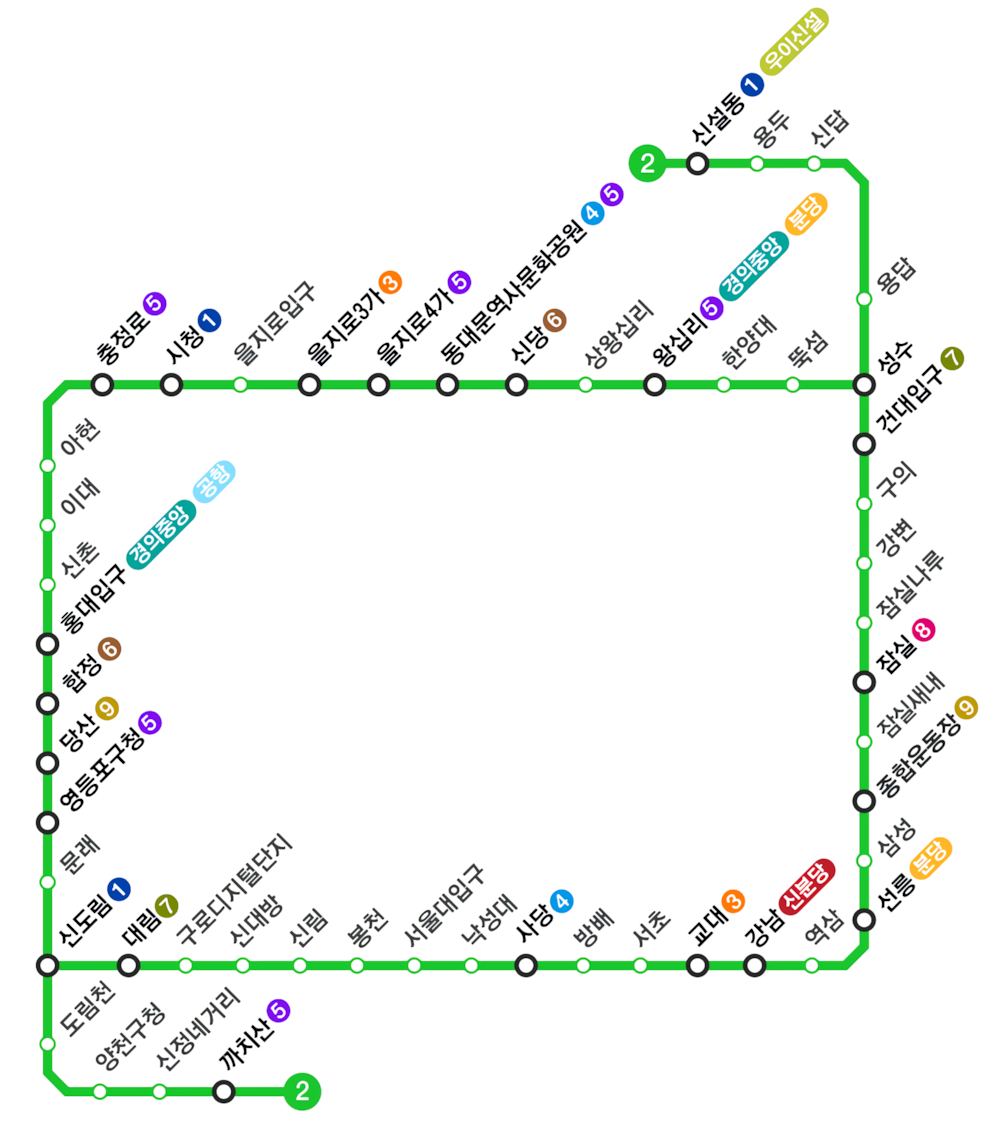

* 2호선 역의 개수 : 51개
#### 참고사항
* 2019년 12월 26일: 동대문역사문화공원역에서 동대문역사문화공원(DDP)역으로, 낙성대역에서 낙성대(강감찬)역으로 변경
* 2019년도 12월에 바뀐건데 안바뀌게 나타난 현상이 있었음

### 2-1. 2호선 데이터 전처리 과정

In [46]:
#2호선에 있는 역부터 시간별로 나누어 보자!
second= timely_df[timely_df["호선"] == "2호선"].reset_index(drop=True)
second

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2호선,강남,Monday,승차,224.0,591.0,1455.0,2408.0,1806.0,1633.0,...,3520.0,4520.0,4977.0,8257.0,13935.0,8619.0,5978.0,6759.0,5325.0,1305.0
1,2호선,강남,Monday,하차,467.0,2068.0,6424.0,13785.0,13135.0,5408.0,...,3425.0,3251.0,3136.0,3892.0,5753.0,3498.0,1529.0,1171.0,878.0,499.0
2,2호선,강남,Tuesday,승차,259.0,624.0,1510.0,2409.0,1797.0,1636.0,...,3585.0,4592.0,5131.0,8443.0,13780.0,8462.0,6200.0,7238.0,5815.0,1496.0
3,2호선,강남,Tuesday,하차,472.0,2012.0,6365.0,13685.0,13043.0,5436.0,...,3486.0,3308.0,3227.0,4098.0,6205.0,3818.0,1593.0,1247.0,1007.0,572.0
4,2호선,강남,Wednesday,승차,272.0,624.0,1498.0,2392.0,1782.0,1616.0,...,3559.0,4534.0,5051.0,8551.0,13617.0,8221.0,5958.0,7304.0,6089.0,1660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2호선,홍대입구,Thursday,하차,120.0,515.0,1233.0,3881.0,3962.0,2316.0,...,2785.0,2850.0,3095.0,4021.0,6014.0,4181.0,1936.0,1488.0,1325.0,1000.0
596,2호선,홍대입구,Friday,승차,483.0,779.0,2257.0,2841.0,1709.0,1165.0,...,1942.0,2349.0,2938.0,4067.0,5489.0,3913.0,3537.0,4654.0,4815.0,1807.0
597,2호선,홍대입구,Friday,하차,120.0,520.0,1204.0,3801.0,3905.0,2346.0,...,3076.0,3157.0,3538.0,4711.0,7317.0,5435.0,2396.0,1746.0,1566.0,1325.0
598,2호선,홍대입구,holiday,승차,529.0,471.0,491.0,649.0,790.0,886.0,...,1981.0,2404.0,3009.0,3463.0,3447.0,3352.0,3813.0,4503.0,3837.0,1272.0


In [47]:
#2호선에 있는 역이 잘 되어있는지 확인!
second["역명"].value_counts()

도림천               12
신당                12
홍대입구              12
서울대입구             12
을지로입구             12
합정                12
삼성                12
선릉                12
성수                12
충정로               12
당산                12
사당                12
왕십리               12
을지로3가             12
잠실새내              12
건대입구              12
대림                12
용두                12
신림                12
신대방               12
동대문역사문화공원(DDP)    12
신답                12
강남                12
잠실나루              12
봉천                12
양천구청              12
잠실                12
종합운동장             12
신도림               12
문래                12
구로디지털단지           12
한양대               12
낙성대               12
뚝섬                12
구의                12
서초                12
시청                12
영등포구청             12
아현                12
신설동               12
강변                12
방배                12
상왕십리              12
이대                12
을지로4가             12
신정네거리             12
역삼                12
용답           

In [48]:
#확인해보니 낙성대와 동대문역사문화공원이 분리가되어있었음
second["역명"].unique()

array(['강남', '강변', '건대입구', '교대', '구로디지털단지', '구의', '낙성대', '당산', '대림',
       '도림천', '동대문역사문화공원(DDP)', '뚝섬', '문래', '방배', '봉천', '사당', '삼성',
       '상왕십리', '서울대입구', '서초', '선릉', '성수', '시청', '신답', '신당', '신대방', '신도림',
       '신림', '신설동', '신정네거리', '신촌', '아현', '양천구청', '역삼', '영등포구청', '왕십리',
       '용답', '용두', '을지로3가', '을지로4가', '을지로입구', '이대', '잠실', '잠실나루', '잠실새내',
       '종합운동장', '충정로', '한양대', '합정', '홍대입구'], dtype=object)

In [49]:
#동대문역사문화공원 찾아서 같은 값으로 변경하기
ddp = second[second["역명"].str.contains("동대문역사문화")].replace(["동대문역사문화공원(DDP)", "동대문역사문화공원(DDP)(DDP)"], "동대문역사문화공원")
ddp

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
120,2호선,동대문역사문화공원,Monday,승차,266.0,168.0,263.0,374.0,375.0,352.0,...,618.0,742.0,978.0,1340.0,1662.0,945.0,676.0,634.0,401.0,187.0
121,2호선,동대문역사문화공원,Monday,하차,36.0,307.0,910.0,2118.0,1173.0,809.0,...,639.0,581.0,534.0,603.0,718.0,851.0,500.0,349.0,268.0,222.0
122,2호선,동대문역사문화공원,Tuesday,승차,276.0,183.0,267.0,381.0,386.0,360.0,...,633.0,744.0,1022.0,1336.0,1662.0,951.0,661.0,659.0,445.0,199.0
123,2호선,동대문역사문화공원,Tuesday,하차,36.0,299.0,907.0,2122.0,1183.0,822.0,...,644.0,588.0,554.0,629.0,760.0,851.0,497.0,352.0,277.0,237.0
124,2호선,동대문역사문화공원,Wednesday,승차,285.0,177.0,263.0,375.0,386.0,353.0,...,642.0,792.0,989.0,1368.0,1675.0,952.0,686.0,688.0,464.0,210.0
125,2호선,동대문역사문화공원,Wednesday,하차,35.0,296.0,903.0,2097.0,1173.0,837.0,...,662.0,600.0,564.0,662.0,779.0,865.0,493.0,354.0,282.0,246.0
126,2호선,동대문역사문화공원,Thursday,승차,277.0,178.0,267.0,377.0,383.0,361.0,...,631.0,825.0,953.0,1355.0,1648.0,946.0,694.0,694.0,481.0,209.0
127,2호선,동대문역사문화공원,Thursday,하차,35.0,294.0,902.0,2094.0,1178.0,843.0,...,671.0,608.0,562.0,658.0,780.0,843.0,502.0,353.0,286.0,252.0
128,2호선,동대문역사문화공원,Friday,승차,278.0,174.0,263.0,372.0,387.0,349.0,...,642.0,800.0,1070.0,1416.0,1714.0,960.0,684.0,707.0,515.0,246.0
129,2호선,동대문역사문화공원,Friday,하차,35.0,297.0,887.0,2051.0,1143.0,847.0,...,694.0,643.0,606.0,711.0,896.0,934.0,539.0,404.0,339.0,313.0


In [50]:
#그룹화하여 하나의 값으로 맞추기
ddp = ddp.groupby(["호선", "역명", "요일", "구분"]).mean().dropna(axis=0).reset_index()
ddp

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2호선,동대문역사문화공원,Monday,승차,266.0,168.0,263.0,374.0,375.0,352.0,...,618.0,742.0,978.0,1340.0,1662.0,945.0,676.0,634.0,401.0,187.0
1,2호선,동대문역사문화공원,Monday,하차,36.0,307.0,910.0,2118.0,1173.0,809.0,...,639.0,581.0,534.0,603.0,718.0,851.0,500.0,349.0,268.0,222.0
2,2호선,동대문역사문화공원,Tuesday,승차,276.0,183.0,267.0,381.0,386.0,360.0,...,633.0,744.0,1022.0,1336.0,1662.0,951.0,661.0,659.0,445.0,199.0
3,2호선,동대문역사문화공원,Tuesday,하차,36.0,299.0,907.0,2122.0,1183.0,822.0,...,644.0,588.0,554.0,629.0,760.0,851.0,497.0,352.0,277.0,237.0
4,2호선,동대문역사문화공원,Wednesday,승차,285.0,177.0,263.0,375.0,386.0,353.0,...,642.0,792.0,989.0,1368.0,1675.0,952.0,686.0,688.0,464.0,210.0
5,2호선,동대문역사문화공원,Wednesday,하차,35.0,296.0,903.0,2097.0,1173.0,837.0,...,662.0,600.0,564.0,662.0,779.0,865.0,493.0,354.0,282.0,246.0
6,2호선,동대문역사문화공원,Thursday,승차,277.0,178.0,267.0,377.0,383.0,361.0,...,631.0,825.0,953.0,1355.0,1648.0,946.0,694.0,694.0,481.0,209.0
7,2호선,동대문역사문화공원,Thursday,하차,35.0,294.0,902.0,2094.0,1178.0,843.0,...,671.0,608.0,562.0,658.0,780.0,843.0,502.0,353.0,286.0,252.0
8,2호선,동대문역사문화공원,Friday,승차,278.0,174.0,263.0,372.0,387.0,349.0,...,642.0,800.0,1070.0,1416.0,1714.0,960.0,684.0,707.0,515.0,246.0
9,2호선,동대문역사문화공원,Friday,하차,35.0,297.0,887.0,2051.0,1143.0,847.0,...,694.0,643.0,606.0,711.0,896.0,934.0,539.0,404.0,339.0,313.0


In [51]:
#기존 값이 들어있는 열 삭제
#삭제 한 것 확인
second = second[(second["역명"] != "동대문역사문화공원(DDP)") & (second["역명"] != "동대문역사문화공원(DDP)(DDP)")]
second["역명"].unique()

array(['강남', '강변', '건대입구', '교대', '구로디지털단지', '구의', '낙성대', '당산', '대림',
       '도림천', '뚝섬', '문래', '방배', '봉천', '사당', '삼성', '상왕십리', '서울대입구', '서초',
       '선릉', '성수', '시청', '신답', '신당', '신대방', '신도림', '신림', '신설동', '신정네거리',
       '신촌', '아현', '양천구청', '역삼', '영등포구청', '왕십리', '용답', '용두', '을지로3가',
       '을지로4가', '을지로입구', '이대', '잠실', '잠실나루', '잠실새내', '종합운동장', '충정로',
       '한양대', '합정', '홍대입구'], dtype=object)

In [52]:
#새로 만든열을 추가!
second = second.append(ddp).reset_index(drop=True)
second.tail(14)

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
586,2호선,홍대입구,holiday,승차,529.0,471.0,491.0,649.0,790.0,886.0,...,1981.0,2404.0,3009.0,3463.0,3447.0,3352.0,3813.0,4503.0,3837.0,1272.0
587,2호선,홍대입구,holiday,하차,76.0,291.0,334.0,586.0,1181.0,1702.0,...,4193.0,4113.0,3910.0,3689.0,3223.0,2185.0,1525.0,1301.0,1002.0,854.0
588,2호선,동대문역사문화공원,Monday,승차,266.0,168.0,263.0,374.0,375.0,352.0,...,618.0,742.0,978.0,1340.0,1662.0,945.0,676.0,634.0,401.0,187.0
589,2호선,동대문역사문화공원,Monday,하차,36.0,307.0,910.0,2118.0,1173.0,809.0,...,639.0,581.0,534.0,603.0,718.0,851.0,500.0,349.0,268.0,222.0
590,2호선,동대문역사문화공원,Tuesday,승차,276.0,183.0,267.0,381.0,386.0,360.0,...,633.0,744.0,1022.0,1336.0,1662.0,951.0,661.0,659.0,445.0,199.0
591,2호선,동대문역사문화공원,Tuesday,하차,36.0,299.0,907.0,2122.0,1183.0,822.0,...,644.0,588.0,554.0,629.0,760.0,851.0,497.0,352.0,277.0,237.0
592,2호선,동대문역사문화공원,Wednesday,승차,285.0,177.0,263.0,375.0,386.0,353.0,...,642.0,792.0,989.0,1368.0,1675.0,952.0,686.0,688.0,464.0,210.0
593,2호선,동대문역사문화공원,Wednesday,하차,35.0,296.0,903.0,2097.0,1173.0,837.0,...,662.0,600.0,564.0,662.0,779.0,865.0,493.0,354.0,282.0,246.0
594,2호선,동대문역사문화공원,Thursday,승차,277.0,178.0,267.0,377.0,383.0,361.0,...,631.0,825.0,953.0,1355.0,1648.0,946.0,694.0,694.0,481.0,209.0
595,2호선,동대문역사문화공원,Thursday,하차,35.0,294.0,902.0,2094.0,1178.0,843.0,...,671.0,608.0,562.0,658.0,780.0,843.0,502.0,353.0,286.0,252.0


In [53]:
#낙성대역도 똑같이 해주면됨!
#낙성대를 찾아서 같은 값으로 변경하기
ns = second[second["역명"].str.contains("낙성대")].replace(["낙성대", "낙성대(강감찬)"], "낙성대(강감찬)")
ns

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
72,2호선,낙성대(강감찬),Monday,승차,448.0,1002.0,3247.0,4977.0,2884.0,1223.0,...,883.0,932.0,1015.0,1310.0,1650.0,933.0,675.0,629.0,478.0,181.0
73,2호선,낙성대(강감찬),Monday,하차,67.0,313.0,732.0,1528.0,1137.0,772.0,...,867.0,1049.0,1205.0,1925.0,3800.0,3405.0,1936.0,1680.0,1545.0,795.0
74,2호선,낙성대(강감찬),Tuesday,승차,438.0,976.0,3232.0,5120.0,2989.0,1263.0,...,887.0,973.0,1054.0,1368.0,1697.0,952.0,706.0,680.0,523.0,195.0
75,2호선,낙성대(강감찬),Tuesday,하차,70.0,316.0,715.0,1486.0,1109.0,751.0,...,856.0,1062.0,1233.0,1957.0,3783.0,3395.0,1941.0,1775.0,1701.0,880.0
76,2호선,낙성대(강감찬),Wednesday,승차,431.0,968.0,3164.0,5058.0,2976.0,1269.0,...,910.0,962.0,1056.0,1406.0,1738.0,948.0,700.0,702.0,532.0,206.0
77,2호선,낙성대(강감찬),Wednesday,하차,70.0,320.0,706.0,1459.0,1104.0,776.0,...,862.0,1047.0,1227.0,1965.0,3759.0,3300.0,1919.0,1788.0,1761.0,924.0
78,2호선,낙성대(강감찬),Thursday,승차,441.0,964.0,3159.0,5045.0,2974.0,1287.0,...,907.0,962.0,1079.0,1390.0,1705.0,952.0,695.0,694.0,546.0,207.0
79,2호선,낙성대(강감찬),Thursday,하차,70.0,305.0,690.0,1438.0,1085.0,747.0,...,868.0,1053.0,1248.0,1953.0,3714.0,3239.0,1909.0,1775.0,1779.0,946.0
80,2호선,낙성대(강감찬),Friday,승차,430.0,947.0,3071.0,4974.0,2935.0,1325.0,...,1018.0,1044.0,1163.0,1545.0,1976.0,1120.0,763.0,730.0,603.0,253.0
81,2호선,낙성대(강감찬),Friday,하차,71.0,287.0,672.0,1410.0,1089.0,751.0,...,925.0,1114.0,1327.0,2043.0,3640.0,3167.0,1786.0,1679.0,1765.0,1055.0


In [54]:
#그룹화하여 하나의 값으로 맞추기
ns = ns.groupby(["호선", "역명", "요일", "구분"]).mean().dropna(axis=0).reset_index()
ns

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2호선,낙성대(강감찬),Monday,승차,448.0,1002.0,3247.0,4977.0,2884.0,1223.0,...,883.0,932.0,1015.0,1310.0,1650.0,933.0,675.0,629.0,478.0,181.0
1,2호선,낙성대(강감찬),Monday,하차,67.0,313.0,732.0,1528.0,1137.0,772.0,...,867.0,1049.0,1205.0,1925.0,3800.0,3405.0,1936.0,1680.0,1545.0,795.0
2,2호선,낙성대(강감찬),Tuesday,승차,438.0,976.0,3232.0,5120.0,2989.0,1263.0,...,887.0,973.0,1054.0,1368.0,1697.0,952.0,706.0,680.0,523.0,195.0
3,2호선,낙성대(강감찬),Tuesday,하차,70.0,316.0,715.0,1486.0,1109.0,751.0,...,856.0,1062.0,1233.0,1957.0,3783.0,3395.0,1941.0,1775.0,1701.0,880.0
4,2호선,낙성대(강감찬),Wednesday,승차,431.0,968.0,3164.0,5058.0,2976.0,1269.0,...,910.0,962.0,1056.0,1406.0,1738.0,948.0,700.0,702.0,532.0,206.0
5,2호선,낙성대(강감찬),Wednesday,하차,70.0,320.0,706.0,1459.0,1104.0,776.0,...,862.0,1047.0,1227.0,1965.0,3759.0,3300.0,1919.0,1788.0,1761.0,924.0
6,2호선,낙성대(강감찬),Thursday,승차,441.0,964.0,3159.0,5045.0,2974.0,1287.0,...,907.0,962.0,1079.0,1390.0,1705.0,952.0,695.0,694.0,546.0,207.0
7,2호선,낙성대(강감찬),Thursday,하차,70.0,305.0,690.0,1438.0,1085.0,747.0,...,868.0,1053.0,1248.0,1953.0,3714.0,3239.0,1909.0,1775.0,1779.0,946.0
8,2호선,낙성대(강감찬),Friday,승차,430.0,947.0,3071.0,4974.0,2935.0,1325.0,...,1018.0,1044.0,1163.0,1545.0,1976.0,1120.0,763.0,730.0,603.0,253.0
9,2호선,낙성대(강감찬),Friday,하차,71.0,287.0,672.0,1410.0,1089.0,751.0,...,925.0,1114.0,1327.0,2043.0,3640.0,3167.0,1786.0,1679.0,1765.0,1055.0


In [55]:
#기존 값이 들어있는 열 삭제
#삭제 한 것 확인
second = second[(second["역명"] != "낙성대") & (second["역명"] != "낙성대(강감찬)")]
second["역명"].unique()

array(['강남', '강변', '건대입구', '교대', '구로디지털단지', '구의', '당산', '대림', '도림천', '뚝섬',
       '문래', '방배', '봉천', '사당', '삼성', '상왕십리', '서울대입구', '서초', '선릉', '성수',
       '시청', '신답', '신당', '신대방', '신도림', '신림', '신설동', '신정네거리', '신촌', '아현',
       '양천구청', '역삼', '영등포구청', '왕십리', '용답', '용두', '을지로3가', '을지로4가',
       '을지로입구', '이대', '잠실', '잠실나루', '잠실새내', '종합운동장', '충정로', '한양대', '합정',
       '홍대입구', '동대문역사문화공원'], dtype=object)

In [56]:
#새로 만든열을 추가!
second = second.append(ns).reset_index(drop=True)
second.tail(14)

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
586,2호선,동대문역사문화공원,holiday,승차,170.0,106.0,133.0,179.0,239.0,232.0,...,569.0,664.0,755.0,772.0,657.0,502.0,460.0,486.0,315.0,132.0
587,2호선,동대문역사문화공원,holiday,하차,28.0,148.0,230.0,452.0,467.0,551.0,...,690.0,619.0,563.0,552.0,462.0,502.0,390.0,290.0,223.0,172.0
588,2호선,낙성대(강감찬),Monday,승차,448.0,1002.0,3247.0,4977.0,2884.0,1223.0,...,883.0,932.0,1015.0,1310.0,1650.0,933.0,675.0,629.0,478.0,181.0
589,2호선,낙성대(강감찬),Monday,하차,67.0,313.0,732.0,1528.0,1137.0,772.0,...,867.0,1049.0,1205.0,1925.0,3800.0,3405.0,1936.0,1680.0,1545.0,795.0
590,2호선,낙성대(강감찬),Tuesday,승차,438.0,976.0,3232.0,5120.0,2989.0,1263.0,...,887.0,973.0,1054.0,1368.0,1697.0,952.0,706.0,680.0,523.0,195.0
591,2호선,낙성대(강감찬),Tuesday,하차,70.0,316.0,715.0,1486.0,1109.0,751.0,...,856.0,1062.0,1233.0,1957.0,3783.0,3395.0,1941.0,1775.0,1701.0,880.0
592,2호선,낙성대(강감찬),Wednesday,승차,431.0,968.0,3164.0,5058.0,2976.0,1269.0,...,910.0,962.0,1056.0,1406.0,1738.0,948.0,700.0,702.0,532.0,206.0
593,2호선,낙성대(강감찬),Wednesday,하차,70.0,320.0,706.0,1459.0,1104.0,776.0,...,862.0,1047.0,1227.0,1965.0,3759.0,3300.0,1919.0,1788.0,1761.0,924.0
594,2호선,낙성대(강감찬),Thursday,승차,441.0,964.0,3159.0,5045.0,2974.0,1287.0,...,907.0,962.0,1079.0,1390.0,1705.0,952.0,695.0,694.0,546.0,207.0
595,2호선,낙성대(강감찬),Thursday,하차,70.0,305.0,690.0,1438.0,1085.0,747.0,...,868.0,1053.0,1248.0,1953.0,3714.0,3239.0,1909.0,1775.0,1779.0,946.0


In [57]:
#다시 새롭게 정렬
second = second.sort_values(["호선", "역명", "요일"])
second

,호선,역명,요일,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 이후
0,2호선,강남,Monday,승차,224.0,591.0,1455.0,2408.0,1806.0,1633.0,...,3520.0,4520.0,4977.0,8257.0,13935.0,8619.0,5978.0,6759.0,5325.0,1305.0
1,2호선,강남,Monday,하차,467.0,2068.0,6424.0,13785.0,13135.0,5408.0,...,3425.0,3251.0,3136.0,3892.0,5753.0,3498.0,1529.0,1171.0,878.0,499.0
2,2호선,강남,Tuesday,승차,259.0,624.0,1510.0,2409.0,1797.0,1636.0,...,3585.0,4592.0,5131.0,8443.0,13780.0,8462.0,6200.0,7238.0,5815.0,1496.0
3,2호선,강남,Tuesday,하차,472.0,2012.0,6365.0,13685.0,13043.0,5436.0,...,3486.0,3308.0,3227.0,4098.0,6205.0,3818.0,1593.0,1247.0,1007.0,572.0
4,2호선,강남,Wednesday,승차,272.0,624.0,1498.0,2392.0,1782.0,1616.0,...,3559.0,4534.0,5051.0,8551.0,13617.0,8221.0,5958.0,7304.0,6089.0,1660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2호선,홍대입구,Thursday,하차,120.0,515.0,1233.0,3881.0,3962.0,2316.0,...,2785.0,2850.0,3095.0,4021.0,6014.0,4181.0,1936.0,1488.0,1325.0,1000.0
572,2호선,홍대입구,Friday,승차,483.0,779.0,2257.0,2841.0,1709.0,1165.0,...,1942.0,2349.0,2938.0,4067.0,5489.0,3913.0,3537.0,4654.0,4815.0,1807.0
573,2호선,홍대입구,Friday,하차,120.0,520.0,1204.0,3801.0,3905.0,2346.0,...,3076.0,3157.0,3538.0,4711.0,7317.0,5435.0,2396.0,1746.0,1566.0,1325.0
574,2호선,홍대입구,holiday,승차,529.0,471.0,491.0,649.0,790.0,886.0,...,1981.0,2404.0,3009.0,3463.0,3447.0,3352.0,3813.0,4503.0,3837.0,1272.0


In [58]:
#맥북으로 옮겨서 parquet을 저장할 때 모듈이 2개 필요함
!pip install pyarrow

In [59]:
!pip install fastparquet

In [60]:
#2호선 parquet을 저장
second.to_parquet("second_line_per_time.parquet")

In [61]:
#저장하는김에 호선별 실시간 데이터도 저장해주자!
timely_df.to_parquet("day-of-week_per_time.parquet")